*** We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

Definition & Working principle¶
Let's build model using Linear regression.

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y
  and one or more independent variable  x
  using best fit line. It work on the principle of ordinary least square  (OLS)
  / Mean square errror  (MSE)
 . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

Hypothesis representation
We will use  xi
  to denote the independent variable and  yi
  to denote dependent variable. A pair of  (xi,yi)
  is called training example. The subscripe  i
  in the notation is simply index into the training set. We have  m
  training example then  i=1,2,3,...m
 .

The goal of supervised learning is to learn a hypothesis function  h
 , for a given training set that can used to estimate  y
  based on  x
 . So hypothesis fuction represented as

hθ(xi)=θ0+θ1xi
 

θ0,θ1
  are parameter of hypothesis.This is equation for Simple / Univariate Linear regression.

For Multiple Linear regression more than one independent variable exit then we will use  xij
  to denote indepedent variable and  yi
  to denote dependent variable. We have  n
  independent variable then  j=1,2,3.....n
 . The hypothesis function represented as

hθ(xi)=θ0+θ1xi1+θ2xi2+.....θjxij......θnxmn
 
θ0,θ1,....θj....θn
  are parameter of hypothesis,  m
  Number of training exaples,  n
  Number of independent variable,  xij
  is  ith
  training exaple of  jth
  feature.

### Import the libraries


In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn

In [22]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")


C:\Users\crazy\AppData\Local\Temp\ipykernel_4752\3818502513.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Make a DataFrame

In [4]:
df=pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There is no null values, there is 3 object type data "Sex","smoker","region"

Now we have import dataset. When we look at the shape of dataset it has return as (1338,7).So there are m=1338
 training exaple and n=7
 independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. There are multiple independent variable, so we need to fit Multiple linear regression. Then the hypothesis function looks like

hθ(xi)=θ0+θ1age+θ2sex+θ3bmi+θ4children+θ5smoker+θ6region
This multiple linear regression equation for given dataset.
If i=1
 then
hθ(x1)=θ0+θ119+θ2female+θ327.900+θ41+θ5yes+θ6southwest
y1=16884.92400
If i=3
 then
hθ(x3)=θ0+θ128+θ2male+θ333.000+θ43+θ5no+θ6northwest
y3=4449.46200
Note: In python index starts from 0.
x1=(x11x12x13x14x15x16)=(19female27.9001nonorthwest)

d:\Data Science\Linear Regression\Insurance Price Prediction\myvenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Charge Vs BMI')

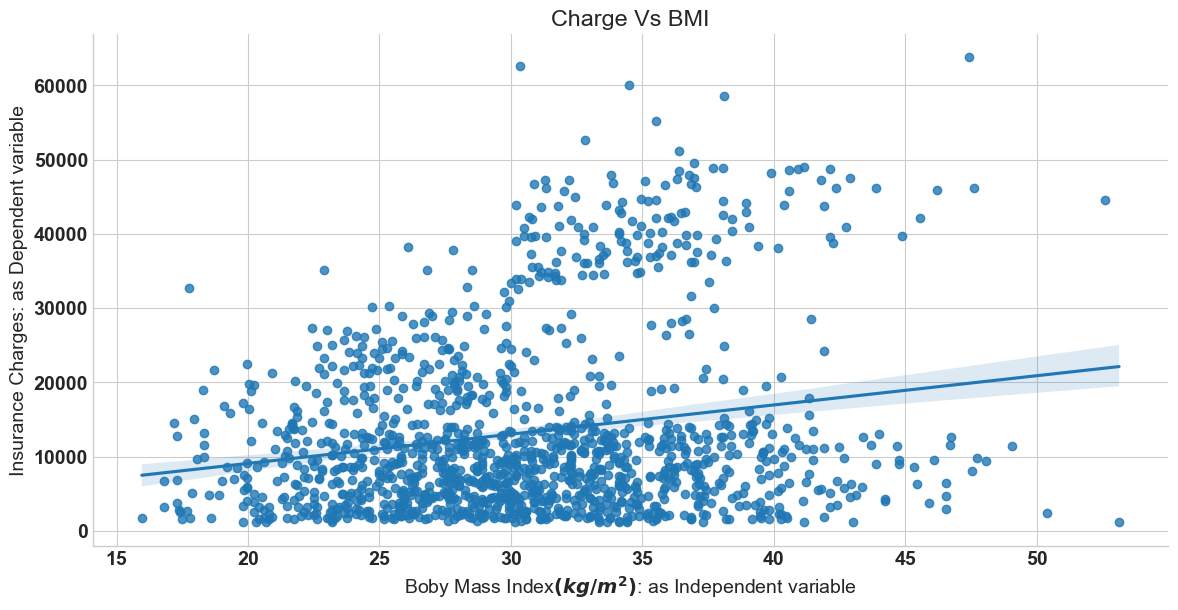

In [8]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

### Cost function
A cost function measures how much error in the model is in terms of ability to estimate the relationship between  x
  and  y
 . We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

J(θ)=1m∑i=1m(y^i−yi)2
 
J(θ)=1m∑i=1m(hθ(xi)−yi)2
 
To implement the linear regression, take training example add an extra column that is  x0
  feature, where  x0=1
 .  xo=(xi0xi1xi2...xmi)
 ,where  xi0=0
  and input matrix will become as

X=(x10x20x30..xm0x11x21x31..xm1x12x22x32..xm2........................x1nx2nx3n...xmn)(m,n+1)
 

Each of the m input samples is similarly a column vector with n+1 rows  x0
  being 1 for our convenience, that is  x10,x20,x30....xm0=1
 . Now we rewrite the ordinary least square cost function in matrix form as
J(θ)=1m(Xθ−y)T(Xθ−y)

Let's look at the matrix multiplication concept,the multiplication of two matrix happens only if number of column of firt matrix is equal to number of row of second matrix. Here input matrix  X
  of size  (m,n+1)
 , parameter of function is of size  (n+1,1)
  and dependent variable vector of size  (m,1)
 . The product of matrix  X(m,n+1)θ(n+1,1)
  will return a vector of size  (m,1)
 , then product of  (Xθ−y)T(1,m)(Xθ−y)(m,1)
  will return size of unit vector.

Normal Equation
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of  J(θ)
  with respect to  θ
  and equate to  0
 . The derivative of function is nothing but if a small change in input what would be the change in output of function.
minθ0,θ1..θnJ(θ0,θ1..θn)
 
∂J(θj)∂θj=0
 
where  j=0,1,2,....n
 
Now we will apply partial derivative of our cost function,
∂J(θj)∂θj=∂∂θ1m(Xθ−y)T(Xθ−y)
 
I will throw  1m
  part away since we are going to compare a derivative to  0
 . And solve  J(θ)
 ,

J(θ)=(Xθ−y)T(Xθ−y)
 
=(Xθ)T−yT)(Xθ−y)
 

=(θTXT−yT)(Xθ−y)
 
=θTXTXθ−yTXθ−θTXTy+yTy
 
=θTXTXθ−2θTXTy+yTy

Here  yT(1,m)X(m,n+1)θ(n+1,1)=θT(1,n+1)XT(n+1,m)y(m,1)
  because unit vector.

∂J(θ)∂θ=∂∂θ(θTXTXθ−2θTXTy+yTy)
 
=XTX∂θTθ∂θ−2XTy∂θT∂θ+∂yTy∂θ
 
Partial derivative  ∂x2∂x=2x
 ,  ∂kx2∂x=kx
 ,  ∂Constact∂x=0
 
∂J(θ)∂θ=XTX2θ−2XTy+0
 
0=2XTXθ−2XTy
 
XTXθ=XT
 
θ=(XTX)−1XTy
 
this the normal equation for linear regression

### Expolaratory Data Analysis

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Correlation between independent variables

In [16]:
num_col=df._get_numeric_data().columns
num_col

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

<Axes: >

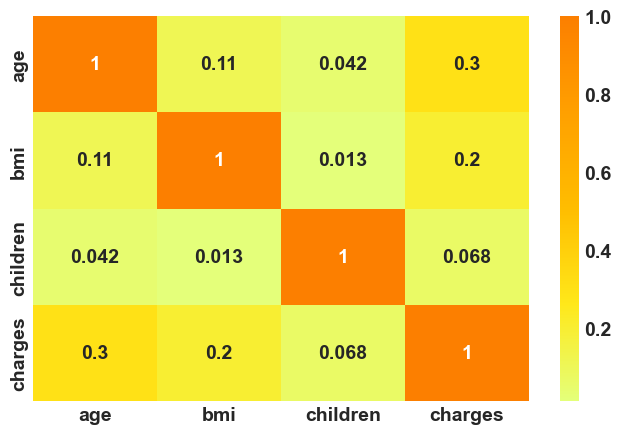

In [18]:
### Correlation Plot
df_numeric=df[num_col]

corr=df_numeric.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

In [19]:
cols=df.columns
cat_column=list(set(cols)-set(num_col))
cat_column

['region', 'smoker', 'sex']

### There is no correlation between variables

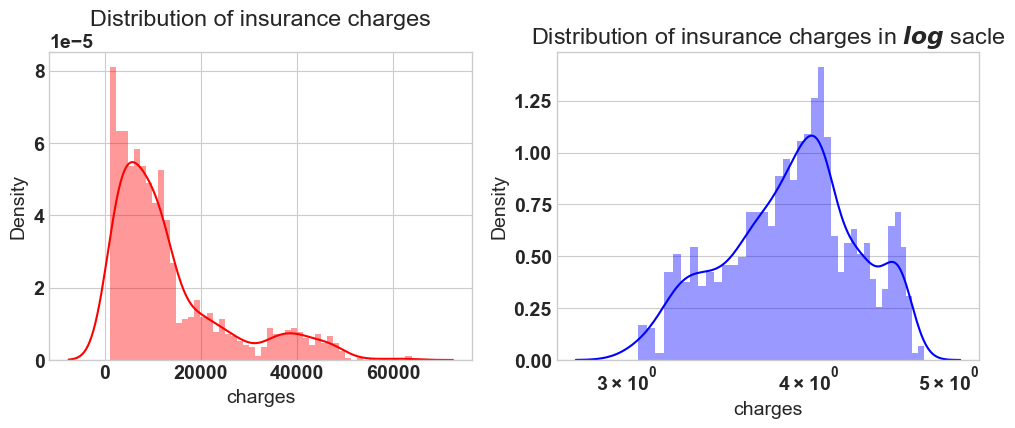

In [23]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

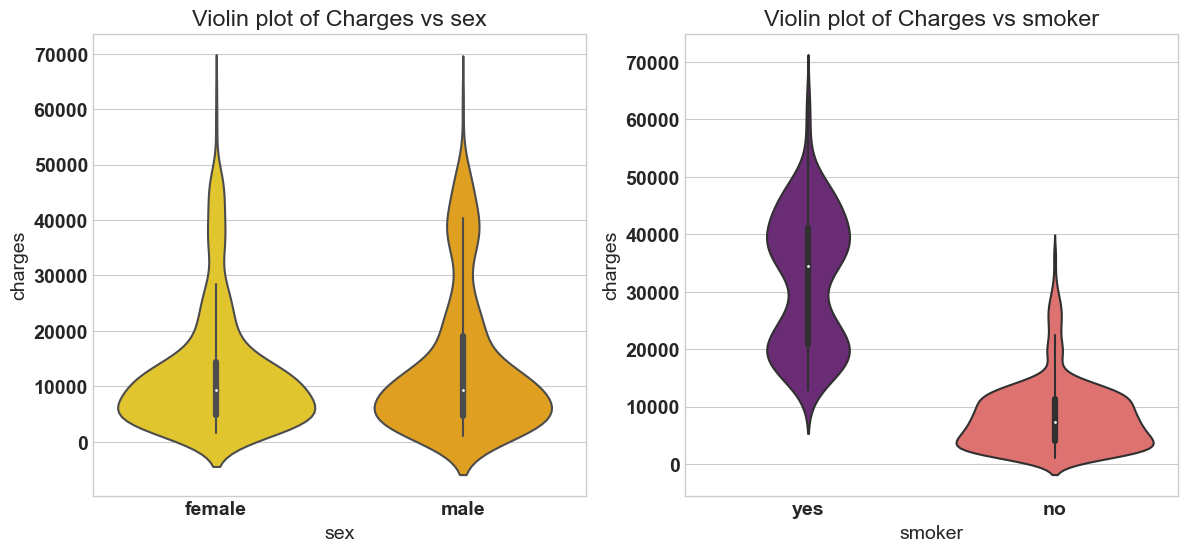

In [24]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

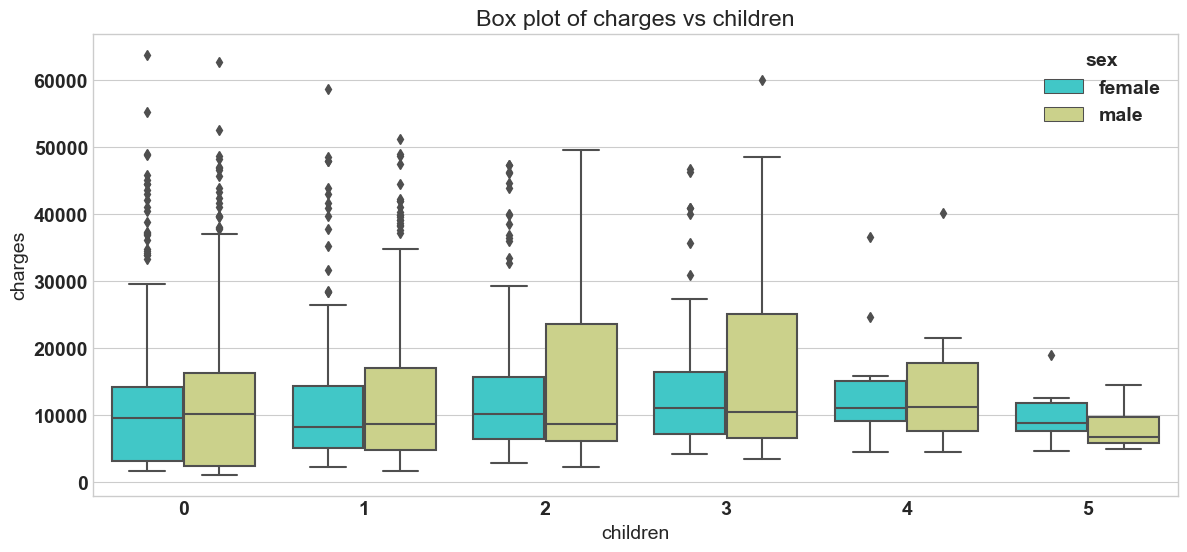

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

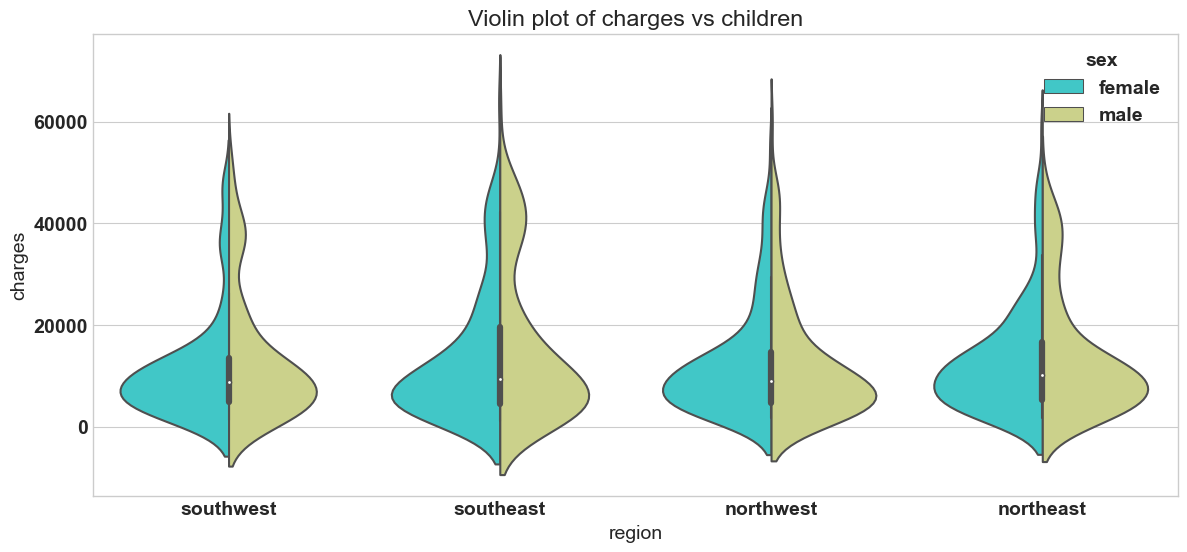

In [27]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

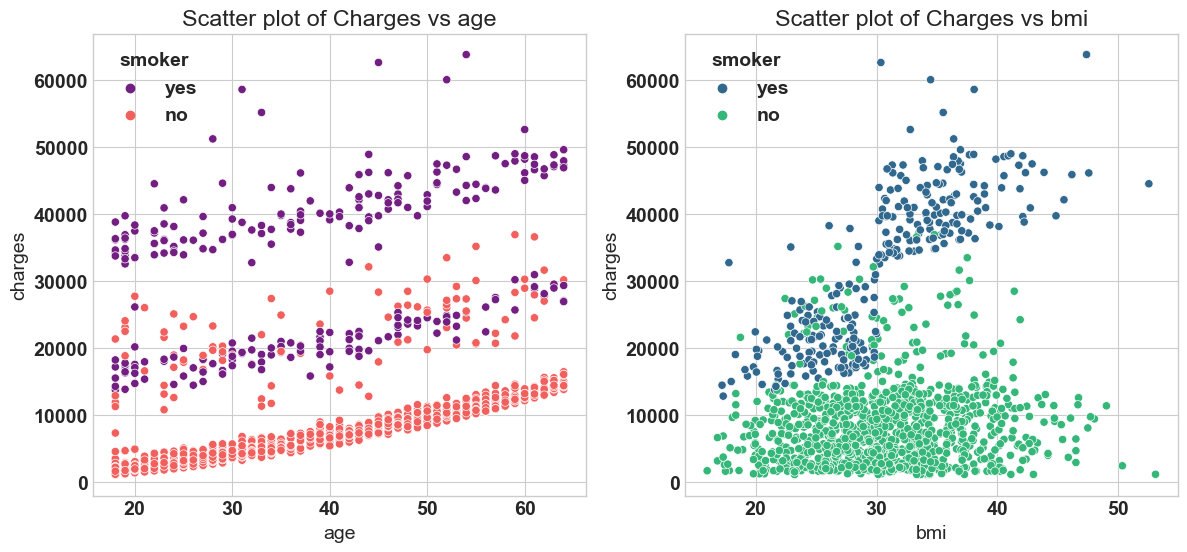

In [28]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st
  and  2nd
  slab, for smoker policy start at  2nd
  and  3rd
  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2
  and maximum upto 54 kg/m2

### Data Preprocessing

Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

Label Encoding
One hot encoding
Dummy variable trap
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [29]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [30]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)


Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.
{yλ−1λ,log(yi)yi¬=0λ=0
 
The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [ ]:
! pip install scipy

In [33]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [34]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

### Train Test Split

In [ ]:
! pip install scikit-learn

In [39]:
from sklearn.model_selection import  train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [41]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
sk_theta

[7.059171468417668,
 0.03313424583920955,
 0.013516836394857533,
 -0.0677673479814151,
 0.14945668717226257,
 0.27291869222319726,
 0.2440948921013919,
 0.5233386281763783,
 0.4660300781575801,
 1.550480772227133,
 -0.055844871149223915,
 -0.1465783084693836,
 -0.13350812257234795]

In [43]:
y_pred=lin_reg.predict(X_test)

In [45]:
y_pred

array([ 9.32802713,  8.66515738, 10.34945923,  9.0857044 ,  8.40799106,
        8.98046205, 10.75033111,  8.56123513,  9.48629526, 10.95620982,
        8.12778368, 11.03779925,  8.1990367 ,  9.44519554,  8.8066528 ,
        8.53335756,  8.63349763,  8.11072376, 10.44179045, 10.44541581,
       11.20306161,  9.15884974,  8.86308192,  9.18807388, 10.58976028,
        8.5096746 ,  8.55315075,  9.61510538,  7.98408686,  9.1190357 ,
        9.38815905,  8.16725233,  8.40520457,  9.45110799,  8.77596203,
        9.8254051 ,  9.36925252,  9.02925783,  9.20804479,  8.38892968,
        9.19748104, 10.59511021,  9.19103022, 10.55946775,  9.26059492,
        9.29888161,  8.47160207,  8.55676594,  9.06500435,  8.69393464,
        9.41454054,  8.84711458,  9.13854193,  8.3013302 ,  8.44151321,
        9.3534316 ,  9.25814227,  9.16721408,  8.8229463 ,  9.61933393,
        9.95125969,  8.4934289 ,  7.90662691,  8.44124922,  8.13630424,
        8.62696136,  8.02643408,  7.94528507,  8.43110132,  9.45

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
R2_score=r2_score(y_pred,y_test)
MSA=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
print("R- Squre value is :", R2_score)
print("Mean absolute error value is :", MSA)
print("Mean squared error value is :", MSE)

R- Squre value is : 0.6828096633609559
Mean absolute error value is : 0.2858130237831317
Mean squared error value is : 0.18729622322981898


R squre value is 68.28 %

In [49]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg=RandomForestRegressor()

rand_forest_reg.fit(X_train,y_train)

y_pred_random =rand_forest_reg.predict(X_test)

R2_score=r2_score(y_pred_random,y_test)
MSA=mean_absolute_error(y_pred_random,y_test)
MSE=mean_squared_error(y_pred_random,y_test)
print("R- Squre value is :", R2_score)
print("Mean absolute error value is :", MSA)
print("Mean squared error value is :", MSE)

R- Squre value is : 0.7763695652417019
Mean absolute error value is : 0.2244535181660444
Mean squared error value is : 0.15669126444104695
